<a href="https://colab.research.google.com/github/Twinn-github09/Brainwave_Matrix_Intern/blob/main/FakeNews_Detection_BERT_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install transformers

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input,Lambda
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils
from transformers import BertModel, TFBertModel
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [5]:
import pandas as pd
from matplotlib import rcParams
import seaborn as sns
import numpy as np
from PIL import Image
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from transformers import AutoTokenizer

In [7]:
fakeNews=pd.read_csv("/content/drive/MyDrive/news/News _dataset/Fake.csv")
realNews=pd.read_csv("/content/drive/MyDrive/news/News _dataset/True.csv")

In [8]:
fakeNews.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [9]:
wordcld_mask=np.array(Image.open("/content/drive/MyDrive/bike.png"))

In [10]:
wordcld_text=" ".join(realNews["text"].tolist())

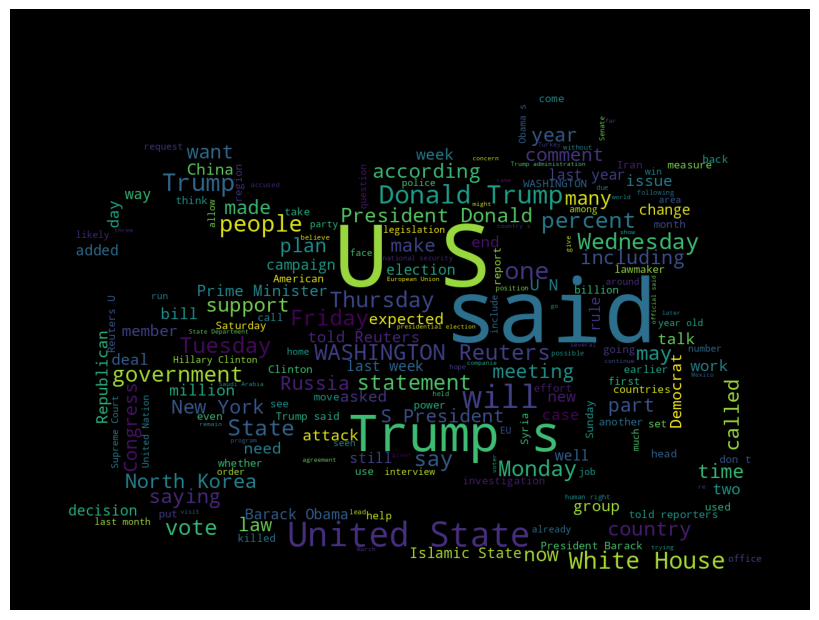

In [11]:
wordcloud=WordCloud(width=1920,height=1080,mask=wordcld_mask).generate(wordcld_text)
fig=plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [12]:
fake_text=" ".join(fakeNews["text"].tolist())


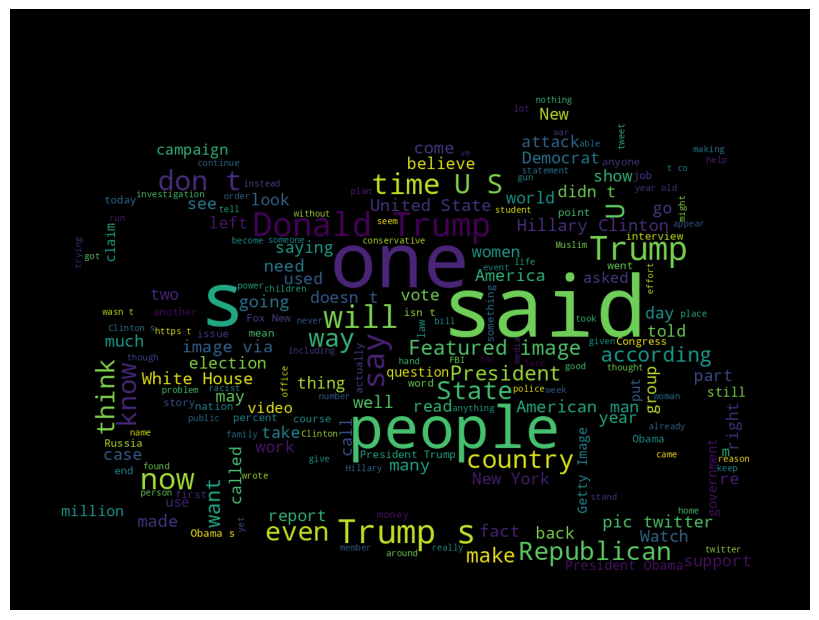

In [13]:
wordcloud=WordCloud(width=1920,height=1080,mask=wordcld_mask).generate(fake_text)
fig=plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [14]:
fakeNews["label"]="fake"
realNews["label"]="real"

In [15]:
final= pd.concat([fakeNews,realNews])

In [16]:
final = final.sample(frac=1).reset_index(drop=True)

In [17]:
final.head()


,title,text,subject,date,label
0,New Jersey Senator Menendez fails to win break...,(Reuters) - A federal judge has rejected Senat...,politicsNews,"September 1, 2017",real
1,Rush Limbaugh: Legalize Rape By Calling It A ...,"During his radio show on Friday, Rush Limbaugh...",News,"May 15, 2016",fake
2,‘Die Hard’ Lion’s Fan Gives Best Ever #Boycott...,This heartfelt Facebook comment by a Detroit L...,left-news,"Sep 24, 2017",fake
3,"Russia holds rates amid geopolitical risks, se...",MOSCOW (Reuters) - The Russian central bank he...,politicsNews,"July 28, 2017",real
4,Black Politician Explains Why Left’s ‘Racist’ ...,Is the Democratic Party really the party of t...,US_News,"October 14, 2017",fake


In [18]:
final.drop(["subject","date"], axis=1)

,title,text,label
0,New Jersey Senator Menendez fails to win break...,(Reuters) - A federal judge has rejected Senat...,real
1,Rush Limbaugh: Legalize Rape By Calling It A ...,"During his radio show on Friday, Rush Limbaugh...",fake
2,‘Die Hard’ Lion’s Fan Gives Best Ever #Boycott...,This heartfelt Facebook comment by a Detroit L...,fake
3,"Russia holds rates amid geopolitical risks, se...",MOSCOW (Reuters) - The Russian central bank he...,real
4,Black Politician Explains Why Left’s ‘Racist’ ...,Is the Democratic Party really the party of t...,fake
...,...,...,...
44893,HECKLERS YELL: “Bill Clinton’s a rapist!” At M...,,fake
44894,WATCH: Patriot’s ‘Stand For Freedom’ Thwarted...,One man s stand for freedom ended disastrous...,fake
44895,HARVEY WEINSTEIN RAPE ACCUSER Has Warrant Issu...,Was the first actress who outed accused rapist...,fake
44896,"Japan, U.S., South Korea to hold missile track...","TOKYO (Reuters) - The United States, Japan and...",real


<Axes: xlabel='label', ylabel='count'>

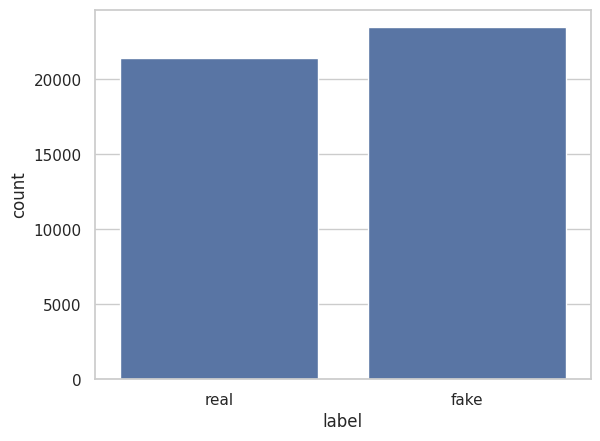

In [19]:
sns.set_theme(style="whitegrid")
sns.countplot(x=final["label"])

In [20]:
final["text"]=final["title"]+final["text"]

In [21]:
final=final[["text","label"]]

In [22]:
final['label'] = final['label'].map({'real':1, 'fake':0})


<ipython-input-22-15d21c3307c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['label'] = final['label'].map({'real':1, 'fake':0})


In [23]:
max_len=100
data_text=final["text"]
data_label=final["label"]

In [24]:
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [25]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [26]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')


In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(data_text, data_label, stratify = data_label, test_size = 0.2, random_state =42)


In [28]:
def tokenize(X):

    X = bert_tokenizer(
        text = list(X),
        add_special_tokens = True,
        max_length = 100,
        truncation = True,
        padding = 'max_length',
        return_tensors = 'tf',
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )
    return X

In [29]:
X_train_token = tokenize(X_train)
X_test_token = tokenize(X_test)
maxlen=100

In [30]:

maxlen = 100
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

def create_model():
    input_ids = Input(shape=(maxlen,), dtype=tf.int32, name='input_ids')
    attention_mask = Input(shape=(maxlen,), dtype=tf.int32, name='attention_mask')
    token_type_ids = Input(shape=(maxlen,), dtype=tf.int32, name='token_type_ids')

    # Use a Lambda layer to wrap the BERT model call
    bert_output = Lambda(lambda x: bert_model(x, training=False)[1])([input_ids, attention_mask, token_type_ids])

    x = Dropout(0.5)(bert_output)
    x = Dense(64, activation="tanh")(x)
    x = Dropout(0.2)(x)
    x = Dense(1, activation="sigmoid")(x)

    model = Model(inputs=[input_ids, attention_mask, token_type_ids], outputs=x)
    return model




Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [31]:
def create_model():
    input_ids = Input(shape=(maxlen,), dtype=tf.int32, name='input_ids')
    attention_mask = Input(shape=(maxlen,), dtype=tf.int32, name='attention_mask')

    # Use a Lambda layer to wrap the BERT model call without token_type_ids
    bert_output = Lambda(lambda x: bert_model(input_ids=x[0], attention_mask=x[1], training=False)[1])([input_ids, attention_mask])

    x = Dropout(0.5)(bert_output)
    x = Dense(64, activation="tanh")(x)
    x = Dropout(0.2)(x)
    x = Dense(1, activation="sigmoid")(x)

    model = Model(inputs=[input_ids, attention_mask], outputs=x)
    return model

In [32]:
model=create_model()
model.summary()

The following Variables were used a Lambda layer's call (lambda), but
are not present in its tracked objects:
  <tf.Variable 'tf_bert_model_1/bert/embeddings/word_embeddings/weight:0' shape=(30522, 768) dtype=float32>
  <tf.Variable 'tf_bert_model_1/bert/embeddings/token_type_embeddings/embeddings:0' shape=(2, 768) dtype=float32>
  <tf.Variable 'tf_bert_model_1/bert/embeddings/position_embeddings/embeddings:0' shape=(512, 768) dtype=float32>
  <tf.Variable 'tf_bert_model_1/bert/embeddings/LayerNorm/gamma:0' shape=(768,) dtype=float32>
  <tf.Variable 'tf_bert_model_1/bert/embeddings/LayerNorm/beta:0' shape=(768,) dtype=float32>
  <tf.Variable 'tf_bert_model_1/bert/encoder/layer_._0/attention/self/query/kernel:0' shape=(768, 768) dtype=float32>
  <tf.Variable 'tf_bert_model_1/bert/encoder/layer_._0/attention/self/query/bias:0' shape=(768,) dtype=float32>
  <tf.Variable 'tf_bert_model_1/bert/encoder/layer_._0/attention/self/key/kernel:0' shape=(768, 768) dtype=float32>
  <tf.Variable 'tf_

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 100)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 100)]                0         []                            
 )                                                                                                
                                                                                                  
 lambda (Lambda)             (None, 768)                  0         ['input_ids[0][0]',           
                                                                     'attention_mask[0][0]']      
                                                                                              

In [33]:
optimizer = Adam(learning_rate=1e-05, epsilon=1e-08, clipnorm=1.0)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = 'accuracy')

In [34]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='max', verbose=1, patience=50,baseline=0.4,min_delta=0.0001,restore_best_weights=False)


In [35]:
history = model.fit(
    x={
        'input_ids': X_train_token['input_ids'],
        'attention_mask': X_train_token['attention_mask'],

    },
    y=Y_train,
    epochs=10,
    validation_split=0.2,
    batch_size=30,
    callbacks=[callback]
)

Epoch 1/10
958/958 [==============================] - 286s 270ms/step - loss: 0.7308 - accuracy: 0.5397 - val_loss: 0.5900 - val_accuracy: 0.7383
Epoch 2/10
958/958 [==============================] - 282s 294ms/step - loss: 0.6401 - accuracy: 0.6345 - val_loss: 0.5031 - val_accuracy: 0.8108
Epoch 3/10
958/958 [==============================] - 281s 294ms/step - loss: 0.5685 - accuracy: 0.7061 - val_loss: 0.4334 - val_accuracy: 0.8520
Epoch 4/10
958/958 [==============================] - 282s 294ms/step - loss: 0.5177 - accuracy: 0.7531 - val_loss: 0.3809 - val_accuracy: 0.8692
Epoch 5/10
958/958 [==============================] - 281s 294ms/step - loss: 0.4742 - accuracy: 0.7840 - val_loss: 0.3386 - val_accuracy: 0.8875
Epoch 6/10
958/958 [==============================] - 282s 294ms/step - loss: 0.4433 - accuracy: 0.8070 - val_loss: 0.3091 - val_accuracy: 0.8925
Epoch 7/10
958/958 [==============================] - 248s 259ms/step - loss: 0.4156 - accuracy: 0.8229 - val_loss: 0.2833 -

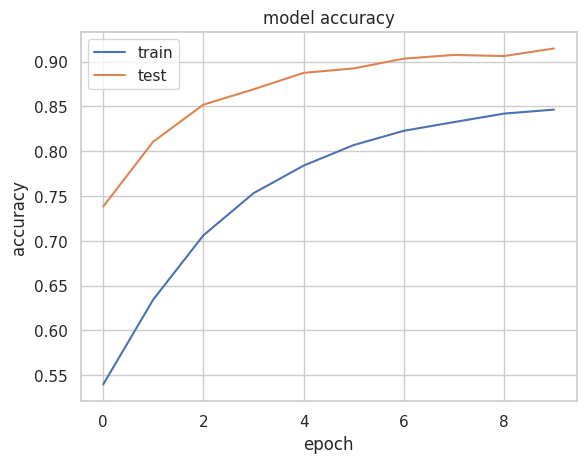

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

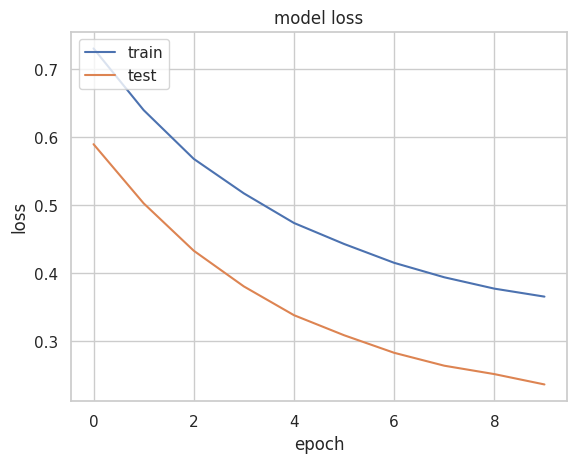

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
y_pred = np.where(model.predict({ 'input_ids' : X_test_token['input_ids'] , 'attention_mask' : X_test_token['attention_mask']}) >=0.5,1,0)

281/281 [==============================] - 73s 214ms/step


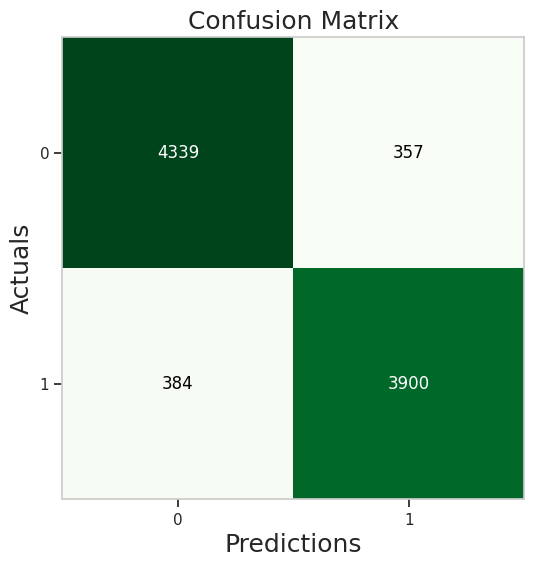

In [41]:
from mlxtend.plotting import plot_confusion_matrix
conf_matrix = confusion_matrix(Y_test,y_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [82]:
test_text="Donald Trump Shares Fake AI-Generated Image Of Himself Amid Arrest Speculations"

In [83]:
test_token = tokenize(test_text)

In [84]:
test_text_pred = np.where(model.predict({ 'input_ids' : test_token['input_ids'] , 'attention_mask' : test_token['attention_mask']}) >=0.5,1,0)

3/3 [==============================] - 1s 175ms/step


In [85]:
test_text_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [86]:
if(test_text_pred[0]==0):
    print("News is Fake")
else:
    print("News is Real")

News is Fake
